# Sentiment Analysis Of Tweets

The task is to squeeze out as much insights as possible from just a single feature (tweets).
The dataset contains tweets categorized as "Offensive (racism/sexism)" labelled as 1 and "Not offensive" labelled as 0.

In [1]:
import re
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import spacy
from tqdm.notebook import tqdm
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

*Loading data set*

In [2]:
train = pd.read_csv("C:/Users/KAUSHIK/Desktop/Sentiment analysis/train.csv")
test = pd.read_csv("C:/Users/KAUSHIK/Desktop/Sentiment analysis/test.csv")

*Preprocessing*

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.drop("id",axis = 1,inplace=True)

In [6]:
train.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
train.shape

(31962, 2)

In [8]:
train.columns

Index(['label', 'tweet'], dtype='object')

In [9]:
train.dtypes

label     int64
tweet    object
dtype: object

In [10]:
train['label'].unique()

array([0, 1], dtype=int64)

In [11]:
train['label'].nunique()

2

In [12]:
train['length'] = train['tweet'].apply(len)
train.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
 2   length  31962 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


*Visualization*

In [15]:
labels = {0: "Positive", 1: "Negative"}
labels

{0: 'Positive', 1: 'Negative'}

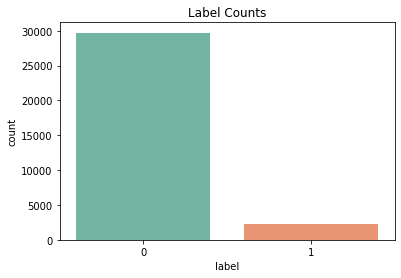

In [16]:
sns.countplot(x= train['label'],palette = "Set2")
plt.title('Label Counts')
plt.show()

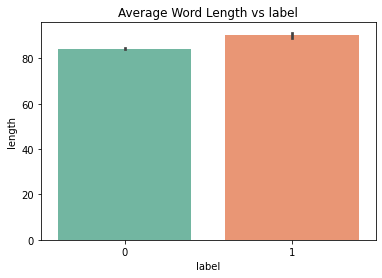

In [17]:
sns.barplot(x= 'label',y= 'length',data =train,palette = "Set2")
plt.title('Average Word Length vs label')
plt.show()

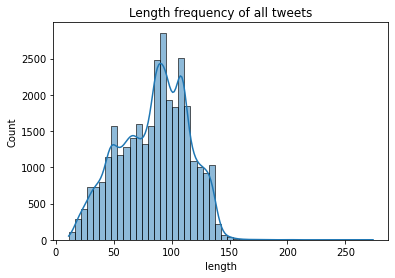

In [18]:
sns.histplot(train['length'],bins = 50,kde=True)

plt.title('Length frequency of all tweets')
plt.show()

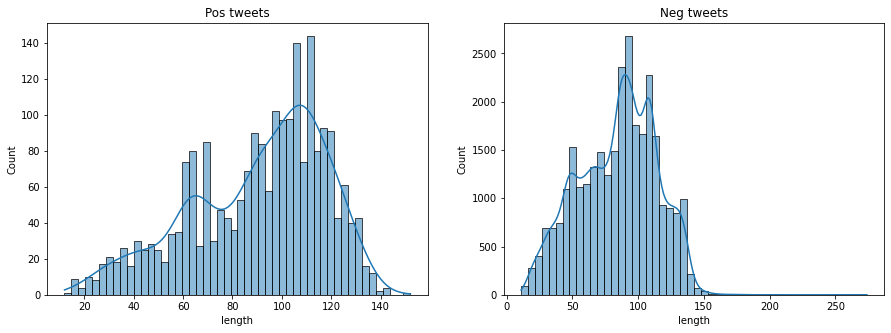

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train[train["label"] == 1]["length"],bins = 50,ax = ax1, kde=True).set(title = "Pos tweets")
sns.histplot(train[train["label"] == 0]["length"],bins = 50,ax = ax2, kde=True).set(title = "Neg tweets")
plt.show()

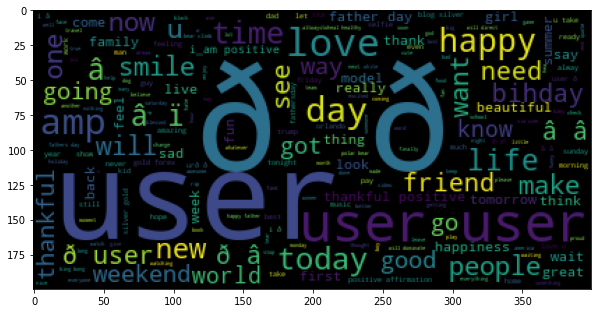

In [20]:
sentences = train['tweet'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_ss))

In [21]:
train['tweets_word_count'] = train['tweet'].apply(lambda x: len(x.strip().split()))

In [22]:
train.head()

,label,tweet,length,tweets_word_count
0,0,@user when a father is dysfunctional and is s...,102,18
1,0,@user @user thanks for #lyft credit i can't us...,122,19
2,0,bihday your majesty,21,3
3,0,#model i love u take with u all the time in ...,86,14
4,0,factsguide: society now #motivation,39,4


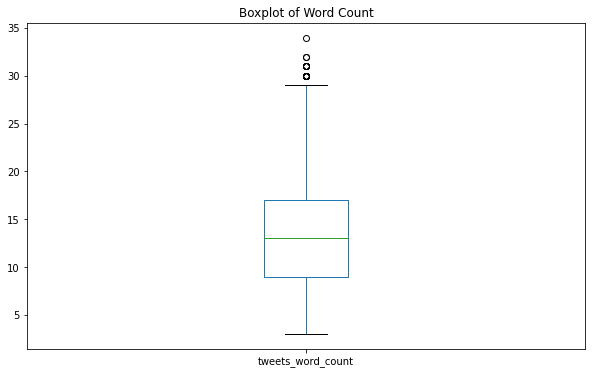

In [23]:
train['tweets_word_count'].plot(kind='box', title='Boxplot of Word Count', figsize=(10,6))
plt.show()

In [24]:
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(train))):
    # split by space into list, take the first x intex, join with space
    text = train.iloc[ii]['tweet'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(merge2.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

  0%|          | 0/31962 [00:00<?, ?it/s]

In [25]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 31962

{'af': 287,
 'ca': 68,
 'cs': 5,
 'cy': 145,
 'da': 259,
 'de': 48,
 'en': 29511,
 'es': 75,
 'et': 71,
 'fi': 19,
 'fr': 150,
 'hr': 22,
 'hu': 1,
 'id': 64,
 'it': 216,
 'lt': 1,
 'nl': 99,
 'no': 303,
 'pl': 17,
 'pt': 44,
 'ro': 66,
 'sk': 4,
 'sl': 20,
 'so': 195,
 'sq': 12,
 'sv': 29,
 'sw': 6,
 'tl': 175,
 'tr': 33,
 'vi': 17}


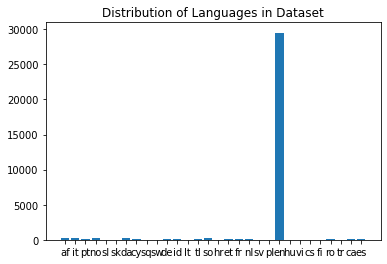

In [26]:
train['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [27]:
train = train[train['language'] == 'en'] 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29511 entries, 0 to 31961
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              29511 non-null  int64 
 1   tweet              29511 non-null  object
 2   length             29511 non-null  int64 
 3   tweets_word_count  29511 non-null  int64 
 4   language           29511 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [28]:
train.head()

,label,tweet,length,tweets_word_count,language
0,0,@user when a father is dysfunctional and is s...,102,18,en
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en
3,0,#model i love u take with u all the time in ...,86,14,en
4,0,factsguide: society now #motivation,39,4,en
5,0,[2/2] huge fan fare and big talking before the...,116,19,en


In [29]:
import warnings
warnings.filterwarnings('ignore')

*Cleaning data*

In [30]:
train['clean_tweet']=train['tweet'].str.lower()
train.head()

,label,tweet,length,tweets_word_count,language,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,en,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,@user @user thanks for #lyft credit i can't us...
3,0,#model i love u take with u all the time in ...,86,14,en,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,4,en,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,[2/2] huge fan fare and big talking before the...


In [31]:
train['clean_tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
Name: clean_tweet, dtype: object

In [32]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before','user','amp','u','im','User',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']



In [33]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train['clean_tweet'] = train['clean_tweet'].apply(lambda text: cleaning_stopwords(text))
train['clean_tweet'].head()

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
3    #model love take time urð±!!! ðððð...
4                      factsguide: society #motivation
5    [2/2] huge fan fare big talking leave. chaos p...
Name: clean_tweet, dtype: object

In [34]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

train['clean_tweet']= train['clean_tweet'].apply(lambda x: cleaning_punctuations(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3    model love take time urð± ðððð ð...
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
Name: clean_tweet, dtype: object

In [35]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_repeating_char(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3    model love take time urð± ðððð ð...
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
Name: clean_tweet, dtype: object

In [36]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_URLs(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3    model love take time urð± ðððð ð...
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
Name: clean_tweet, dtype: object

In [37]:
def cleaning_symb(data):
    return re.sub('(([^\x00-\x7F]+)|(s/ ( *)/\1/g))',' ',data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_symb(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3                         model love take time ur     
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
Name: clean_tweet, dtype: object

In [38]:
def cleaning_space(data):
    return re.sub('  +', ' ',data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_space(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3                             model love take time ur 
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
Name: clean_tweet, dtype: object

In [39]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: cleaning_numbers(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3                             model love take time ur 
4                        factsguide society motivation
5     huge fan fare big talking leave chaos pay dis...
Name: clean_tweet, dtype: object

In [40]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,en,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,user user thanks lyft credit cant use cause do...
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay dis...
...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate user isz youuu
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,user sikh temple vandalised calgary wso condem...


In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KAUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: lemmatizer_on_text(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3                             model love take time ur 
4                        factsguide society motivation
5     huge fan fare big talking leave chaos pay dis...
Name: clean_tweet, dtype: object

In [43]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: stemming_on_text(x))
train['clean_tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
3                             model love take time ur 
4                        factsguide society motivation
5     huge fan fare big talking leave chaos pay dis...
Name: clean_tweet, dtype: object

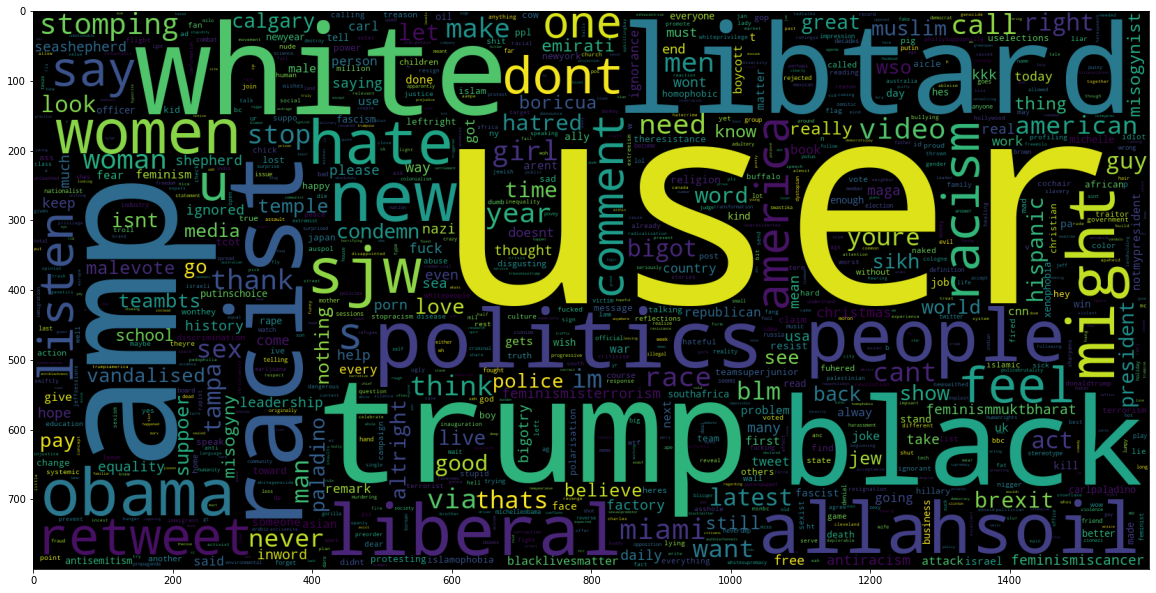

In [44]:
tweet_neg = train['clean_tweet'][train["label"]==1]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(tweet_neg))
plt.imshow(wc)

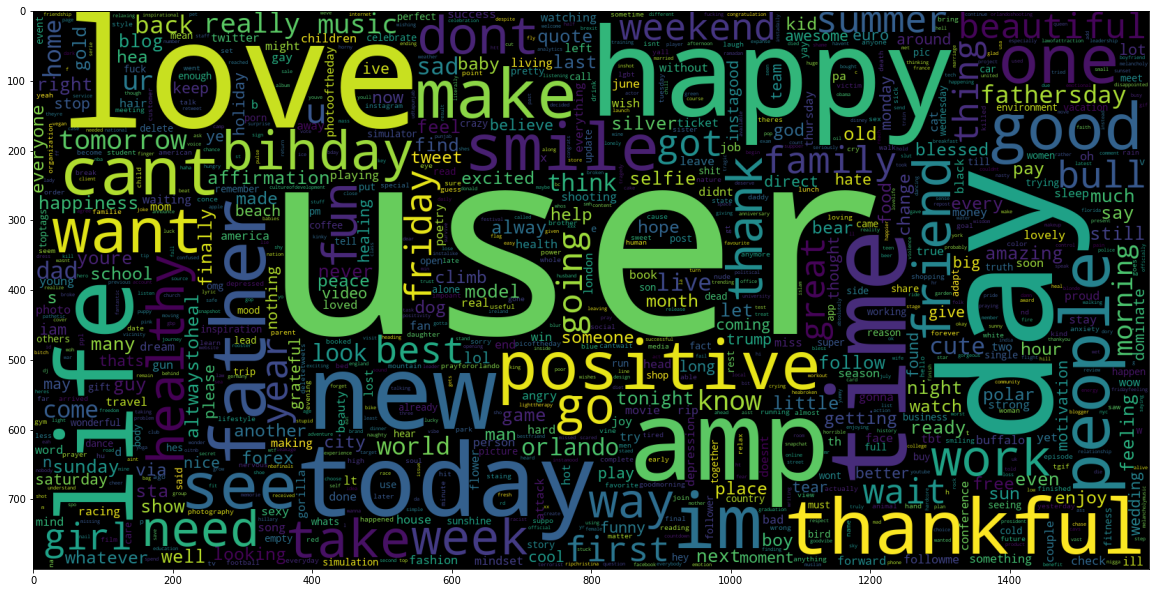

In [45]:
tweet_pos = train['clean_tweet'][train["label"]==0]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(tweet_pos))
plt.imshow(wc)

In [46]:
import plotly.express as px 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
def count_ngrams(dataframe,column,begin_ngram,end_ngram):
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dataframe[column].dropna())
    frequencies = sum(sparse_matrix).toarray()[0]
    most_common = pd.DataFrame(frequencies, 
                               index=word_vectorizer.get_feature_names(), 
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

In [49]:
uni_gram = count_ngrams(train,'clean_tweet',1,1)

<Figure size 2880x504 with 0 Axes>

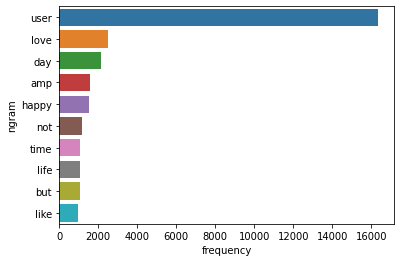

<Figure size 2880x504 with 0 Axes>

In [50]:
ax = sns.barplot(x="frequency", y="ngram", data=uni_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [51]:
bii_gram = count_ngrams(train,'clean_tweet',2,2)

<Figure size 2880x504 with 0 Axes>

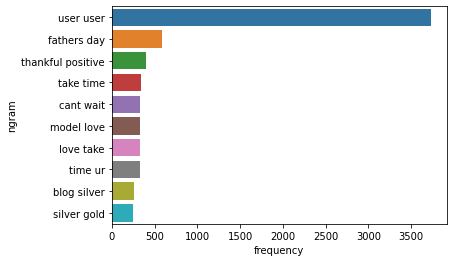

<Figure size 2880x504 with 0 Axes>

In [52]:
ax = sns.barplot(x="frequency", y="ngram", data=bii_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [53]:
three_gram = count_ngrams(train,'clean_tweet',3,3)

<Figure size 2880x504 with 0 Axes>

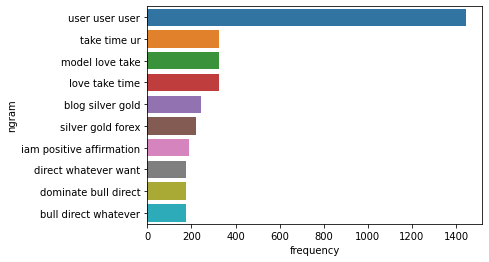

<Figure size 2880x504 with 0 Axes>

In [54]:
ax = sns.barplot(x="frequency", y="ngram", data=three_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [55]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

train['clean_token_tweet']=train['clean_tweet'].apply(tokenizer.tokenize)
train['clean_token_tweet'].head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
3                        [model, love, take, time, ur]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talking, leave, chaos, ...
Name: clean_token_tweet, dtype: object

In [56]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet
0,0,@user when a father is dysfunctional and is s...,102,18,en,user father dysfunctional selfish drags kids d...,"[user, father, dysfunctional, selfish, drags, ..."
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,user user thanks lyft credit cant use cause do...,"[user, user, thanks, lyft, credit, cant, use, ..."
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]"
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]"
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay dis...,"[huge, fan, fare, big, talking, leave, chaos, ..."
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate user isz youuu,"[ate, user, isz, youuu]"
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,user sikh temple vandalised calgary wso condem...,"[user, sikh, temple, vandalised, calgary, wso,..."


In [57]:
len(train['clean_token_tweet'])

29511

In [58]:
train['token_word_count'] = train['clean_token_tweet'].apply(lambda x: len(x))

In [59]:
train.head()

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet,token_word_count
0,0,@user when a father is dysfunctional and is s...,102,18,en,user father dysfunctional selfish drags kids d...,"[user, father, dysfunctional, selfish, drags, ...",8
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,user user thanks lyft credit cant use cause do...,"[user, user, thanks, lyft, credit, cant, use, ...",15
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]",5
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]",3
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay dis...,"[huge, fan, fare, big, talking, leave, chaos, ...",12


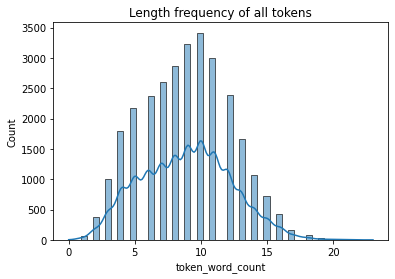

In [60]:
sns.histplot(train['token_word_count'],bins = 50,kde=True)

plt.title('Length frequency of all tokens')
plt.show()

<AxesSubplot:ylabel='Density'>

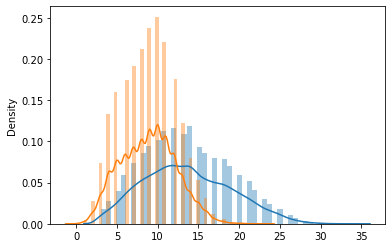

In [61]:
import numpy as np
sns.distplot(np.array(train.tweets_word_count))
sns.distplot(np.array(train.token_word_count))

In [62]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet,token_word_count
0,0,@user when a father is dysfunctional and is s...,102,18,en,user father dysfunctional selfish drags kids d...,"[user, father, dysfunctional, selfish, drags, ...",8
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,user user thanks lyft credit cant use cause do...,"[user, user, thanks, lyft, credit, cant, use, ...",15
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]",5
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]",3
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay dis...,"[huge, fan, fare, big, talking, leave, chaos, ...",12
...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate user isz youuu,"[ate, user, isz, youuu]",4
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...,"[see, nina, turner, airwaves, trying, wrap, ma...",14
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ...",8
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,user sikh temple vandalised calgary wso condem...,"[user, sikh, temple, vandalised, calgary, wso,...",8


In [63]:
def preprocess_tweets(df_series):
    """ Removes account tags (@user) and all non-alphanumeric characters except whitespace.
        
    Args:
        df_series (pd.series): Pandas series object containing tweets.
        
    Returns: 
        df_series (pd.series): Preprocessed series object. 
    """
    
    # Removes '@user' tags
    df_series = df_series.str.replace("@user", "", regex=False)
    
    # Removes non alphanumeric characters
    df_series = df_series.str.replace("[^a-zA-Z0-9 ]", " ")
    return df_series
    

def tokenize(sentence, remove_stopwords=False):
    """ Tokenizes given sentence.
        
    Args:
        sentence (str): Sentence to be tokenized
        remove_stopwords (bool): removes stop words if set True. Defaults to False.
        
    Returns: 
        tokens (list): Tokenized array
    """
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = sentence.split()
        tokens = [token for token in tokens if not token.lower() in stop_words]
        return tokens
        
    return sentence.split()
    

def create_corpus(df_series, remove_stopwords=False):
    """ Creates preprocessed, lemmatized word corpus from pandas series.
        
    Args:
        df_series (pd.series): Pandas series object containing tweets.
        remove_stopwords (bool): removes stop words if set True. Defaults to False.
        
    Returns: 
    corpus (list): Tokenized, Lemmatized word corpus. 
    """
    
    corpus = []
    lm = WordNetLemmatizer()
    df_series = preprocess_tweets(df_series)
    
    for tweet in df_series:
        corpus.extend([lm.lemmatize(word) for word in tokenize(tweet, remove_stopwords=remove_stopwords)])
    
    return corpus
    

In [64]:
def create_ner_dict(df_series):
   
    NER = spacy.load("en_core_web_sm")
    NER_dict = {"text": [], "named_entity":[]}
    
    # Preprocessing tweets
    preprocessed_tweets = preprocess_tweets(df_series)
    
    # Removing stop words and creating named entity recognition dict
    for tweet in preprocessed_tweets:
        sentence = tokenize(tweet, remove_stopwords=True)
        sentence = ' '.join(map(str, sentence))
        doc = NER(sentence)
        NER_dict["text"].extend([token.text for token in doc.ents])
        NER_dict["named_entity"].extend([token.label_ for token in doc.ents])
        
    return NER_dict


In [65]:
# Named entity recognition of tweets of different categories
non_offensive_NER_dict = create_ner_dict(train[train["label"]==0].tweet)
offensive_NER_dict = create_ner_dict(train[train["label"]==1].tweet)

In [66]:
# Converting to DataFrame
non_offensive_NER_df = pd.DataFrame.from_dict(non_offensive_NER_dict)
offensive_NER_df = pd.DataFrame.from_dict(offensive_NER_dict)

In [67]:
# Displaying sample observations
display(non_offensive_NER_df.head())
display(offensive_NER_df.head())

,text,named_entity
0,2 2,CARDINAL
1,danny,PERSON
2,next school year year,DATE
3,ireland,GPE
4,orlando,GPE


,text,named_entity
0,cnn,ORG
1,michigan,GPE
2,australia,GPE
3,21st century,DATE
4,republican,NORP


<AxesSubplot:ylabel='named_entity'>

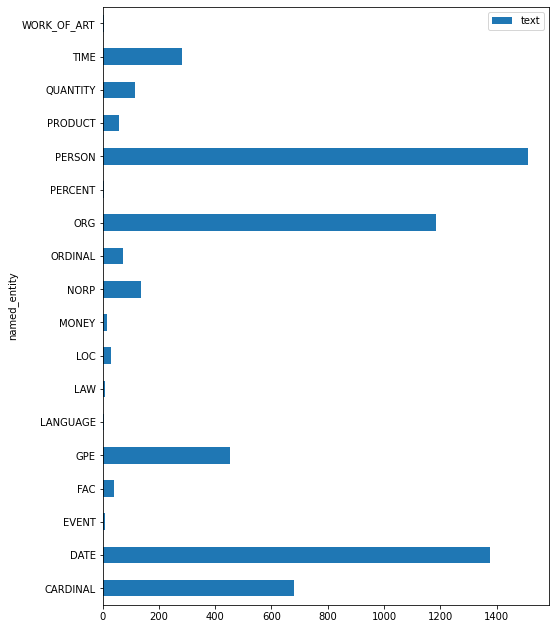

In [68]:
# Plotting named entities mentioned most times in Non-Offensive tweets
non_offensive_NER_df.groupby("named_entity").agg({"text": pd.Series.nunique}).plot.barh(figsize=(8,11))

<AxesSubplot:ylabel='named_entity'>

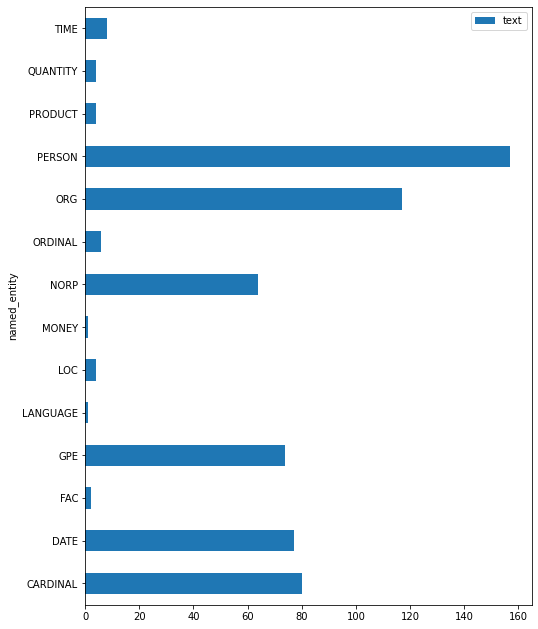

In [69]:
# Plotting named entities mentioned most times in Offensive tweets
offensive_NER_df.groupby("named_entity").agg({"text": pd.Series.nunique}).plot.barh(figsize=(8,11))

In [70]:
# Creates new df containing count of text by each named entity of Non offensive tweets
non_offensive_NER_text_occurances = non_offensive_NER_df.groupby("named_entity").agg({"text": list})
non_offensive_NER_text_occurances["text_counts"] = non_offensive_NER_text_occurances.agg({"text": Counter})["text"]

In [71]:
display(non_offensive_NER_text_occurances)

,text,text_counts
named_entity,,
CARDINAL,"[2 2, 80, 00, 50, 1, 2, 15, 1 1400, one, 100, ...","{'2 2': 3, '80': 11, '00': 4, '50': 54, '1': 1..."
DATE,"[next school year year, friday, badday, weeken...","{'next school year year': 1, 'friday': 433, 'b..."
EVENT,"[europe euro2016, acewellstucker cynthiabailey...","{'europe euro2016': 1, 'acewellstucker cynthia..."
FAC,"[disneyland, orlando nightclub, abuja nigeria,...","{'disneyland': 6, 'orlando nightclub': 1, 'abu..."
GPE,"[ireland, orlando, got7, orlando, nohern irela...","{'ireland': 12, 'orlando': 229, 'got7': 2, 'no..."
LANGUAGE,"[english, filipino, english, english, english,...","{'english': 12, 'filipino': 1, 'ohaaa20': 1, '..."
LAW,"[kirby feast, chapter 4, aymcuainraiser 5, cha...","{'kirby feast': 1, 'chapter 4': 1, 'aymcuainra..."
LOC,"[europe, europe, nyc, nyc, nyc, nyc, nyc, nyc,...","{'europe': 17, 'nyc': 48, 'cherry moon': 1, 'b..."
MONEY,"[2 2m old school, 70 bucks, 10 inc p, 59000 58...","{'2 2m old school': 1, '70 bucks': 1, '10 inc ..."


In [72]:
# Creates new df containing count of text by each named entity of Offensive tweets
offensive_NER_text_occurances = offensive_NER_df.groupby("named_entity").agg({"text": list})
offensive_NER_text_occurances["text_counts"] = offensive_NER_text_occurances.agg({"text": Counter})["text"]

In [73]:
def sort_dict_by_value(dictionary, reverse=False):
    """ Returns list of (value, key) tuples sorted by value.
    
    Args:
        dictionary (dict): Dict of key, value pairs.
        reverse (bool): Sorts in descending order if set True. Defaults to False
        
    Returns:
        list: Contains (value, key) tuples sorted by value
    """
    
    return sorted(
        dict((value, key) for (key, value) in dictionary.items()).items(),
        reverse=reverse
    )

def max_val_of_dict(dictionary):
    """ Returns list containing maximum value and its corresponding 
        key in a dict.
        
    Args:
        dictionary (dict): Dict of key, value pairs.
            
    Returns:
        list: Contains corresponding key of maximum value in the dictionary
              and the maximum value itself.
    """
    
    max_key = max(dictionary, key=dictionary.get)
    max_value = dictionary[max_key]
    
    return [max_key, max_value]

In [74]:
# displays highest repeated text by each named entity in Non offensive tweets
n_rows, n_cols = non_offensive_NER_text_occurances.shape

for i in range(n_rows):
    non_offensive_NER_text_occurances["text_counts"][i] = sort_dict_by_value(
                                                                non_offensive_NER_text_occurances["text_counts"][i],
                                                                reverse=True
                                                            )

non_offensive_NER_text_occurances.reset_index(inplace=True)
display(non_offensive_NER_text_occurances)

,named_entity,text,text_counts
0,CARDINAL,"[2 2, 80, 00, 50, 1, 2, 15, 1 1400, one, 100, ...","[(386, one), (280, 2), (188, 3), (142, 4), (13..."
1,DATE,"[next school year year, friday, badday, weeken...","[(864, today), (433, friday), (337, summer), (..."
2,EVENT,"[europe euro2016, acewellstucker cynthiabailey...","[(3, world cup), (2, wimbledon), (1, royal asc..."
3,FAC,"[disneyland, orlando nightclub, abuja nigeria,...","[(6, disneyland), (2, chicago trump tower), (1..."
4,GPE,"[ireland, orlando, got7, orlando, nohern irela...","[(229, orlando), (123, london), (106, america)..."
5,LANGUAGE,"[english, filipino, english, english, english,...","[(12, english), (1, spanish)]"
6,LAW,"[kirby feast, chapter 4, aymcuainraiser 5, cha...","[(1, info3002 info2000)]"
7,LOC,"[europe, europe, nyc, nyc, nyc, nyc, nyc, nyc,...","[(48, nyc), (17, europe), (3, playing moon), (..."
8,MONEY,"[2 2m old school, 70 bucks, 10 inc p, 59000 58...","[(1, 2 095m)]"
9,NORP,"[hawaiian, japanese, muslim, republicans, amer...","[(34, american), (27, muslim), (16, republican..."


In [75]:
# displays highest repeated text by each named entity in Offensive tweets
n_rows, n_cols = offensive_NER_text_occurances.shape

for i in range(n_rows):
    offensive_NER_text_occurances["text_counts"][i] = sort_dict_by_value(
                                                                offensive_NER_text_occurances["text_counts"][i],
                                                                reverse=True
                                                            )

offensive_NER_text_occurances.reset_index(inplace=True)

display(offensive_NER_text_occurances)

,named_entity,text,text_counts
0,CARDINAL,"[millions, 7, 75, 60, 2, 1, 2, 2016in4words, 2...","[(37, 2), (26, one), (20, 4), (12, 2016in4word..."
1,DATE,"[21st century, 25 jan, next week, 8 years 2016...","[(26, 2016), (20, 2017), (13, today), (12, use..."
2,FAC,"[moto 360, u 2]","[(1, u 2)]"
3,GPE,"[michigan, australia, america, usa, pittsburgh...","[(38, america), (14, miami), (12, israel), (11..."
4,LANGUAGE,"[arabic, arabic]","[(2, arabic)]"
5,LOC,"[asia asians africa, europe, nyc, nyc, europe,...","[(4, nyc), (2, africa), (1, asia asians africa)]"
6,MONEY,"[million dollar, million dollar]","[(2, million dollar)]"
7,NORP,"[republican, african american, nazis, american...","[(29, hispanic), (20, americans), (13, republi..."
8,ORDINAL,"[first, first, first, 15th, 5th, first, first,...","[(11, first), (2, 14th), (1, second)]"
9,ORG,"[cnn, codeword, congress, white house, bc, u b...","[(11, islam), (10, gop), (8, ag), (7, anc), (4..."


In [76]:
# These are the named entities that we want to explore further
req_entities = ["PERSON", "GPE", "LANGUAGE", "NORP", "ORG"]
n_req_entities = len(req_entities)

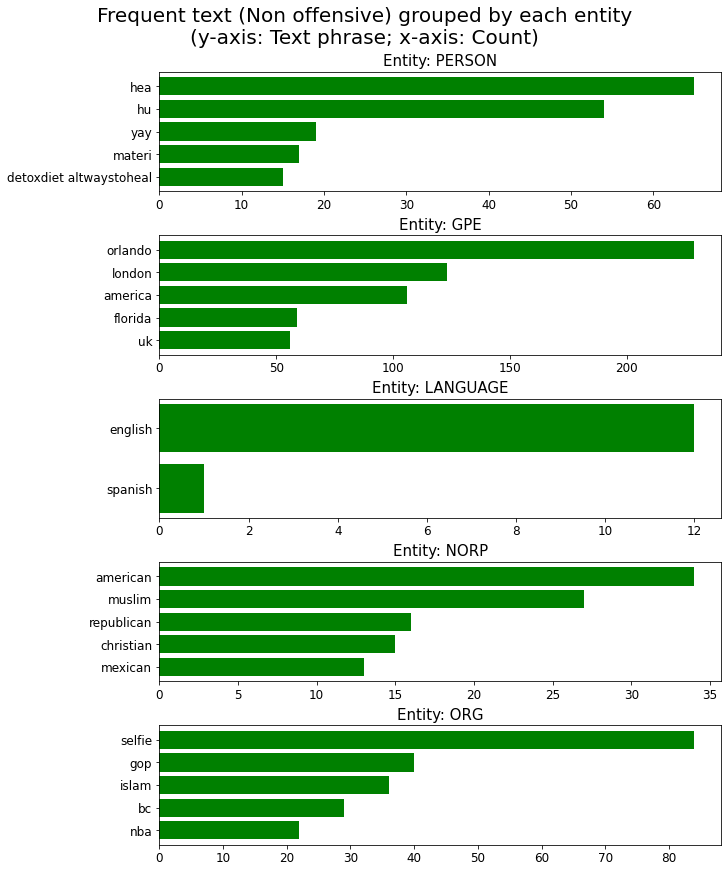

In [77]:
# Visualizes most repetetive Non offensive text phrases from each named entity
fig1, ax3 = plt.subplots(n_req_entities, constrained_layout=True, figsize=(10, 12))
fig1.suptitle("Frequent text (Non offensive) grouped by each entity\n(y-axis: Text phrase; x-axis: Count)", fontsize=20)

for i in range(n_req_entities):
    x, yticklabels = list(zip(
                        *non_offensive_NER_text_occurances[non_offensive_NER_text_occurances["named_entity"] == req_entities[i]]["text_counts"].values[0][:5]))
    ax3[i].barh(yticklabels, x, color='green')
    ax3[i].set_title("Entity: " + req_entities[i], fontsize=15)
    ax3[i].tick_params(labelsize=12)
    ax3[i].invert_yaxis()

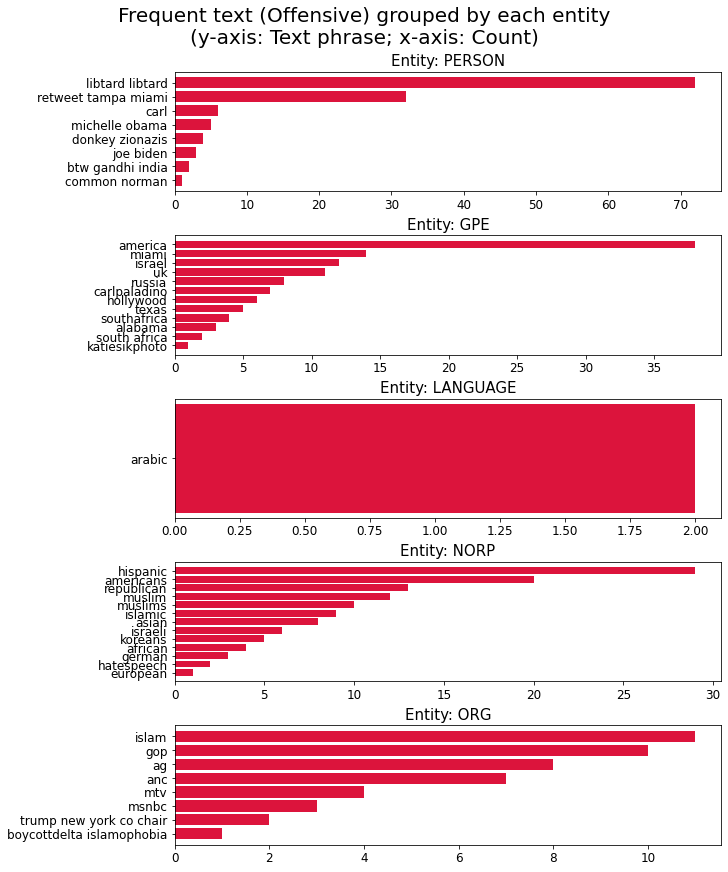

In [78]:
#Visualizes most repetetive Offensive text phrases from each named entity
fig2, ax4 = plt.subplots(n_req_entities, constrained_layout=True, figsize=(10, 12))
fig2.suptitle("Frequent text (Offensive) grouped by each entity\n(y-axis: Text phrase; x-axis: Count)", fontsize=20)

for i in range(n_req_entities):
    x, yticklabels = list(zip(
                        *offensive_NER_text_occurances[offensive_NER_text_occurances["named_entity"] == req_entities[i]]["text_counts"].values[0][:]))
    ax4[i].barh(yticklabels, x, color='crimson')
    ax4[i].set_title("Entity: " + req_entities[i], fontsize=15)
    ax4[i].tick_params(labelsize=12)
    ax4[i].invert_yaxis()

In [79]:
def get_hash_tags(df_series):
    """ Collects all hash tags from a given pandas series.
    
    Args:
        df_series (pd.Series): Pandas series object containing text data.
    
    Returns:
        hash_tags (list): List of hash tags from the pandas series.
    """
    
    hash_tags = []
    for text in df_series:
        hash_tags.extend(re.findall(r'#(\w+)', text))
        
    return hash_tags

In [80]:
non_offensive_hashtags = get_hash_tags(train[train["label"]==0]["tweet"])
offensive_hashtags = get_hash_tags(train[train["label"]==1]["tweet"])

In [81]:
def plot_word_cloud(corpus):
    """ Creates and plots the word cloud from word corpus.
        
    Args:
        corpus (list): word corpus containing all the tokens.
        
    Returns: Nothing
    
    """
    
    # creates word cloud
    word_cloud = WordCloud(
        max_words = 100,
        max_font_size = 50,
        collocations = False
    ).generate(str(corpus))
    
    # plots word cloud
    fig = plt.figure(figsize=(13, 13))
    plt.axis('off')
    plt.imshow(word_cloud)
    plt.plot()

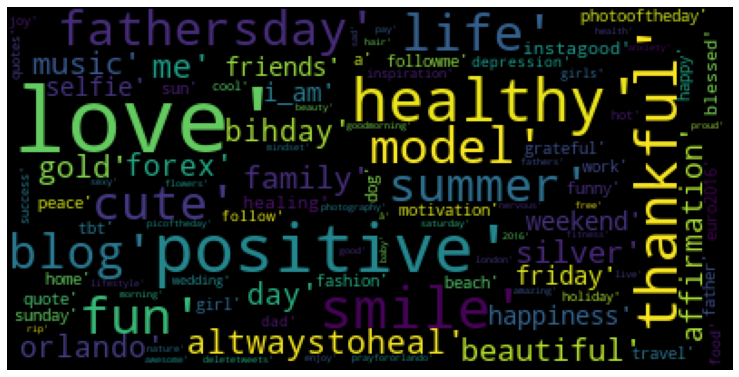

In [82]:
# Word cloud of top mentioned hashtags in Non-offensive tweets
plot_word_cloud(non_offensive_hashtags)

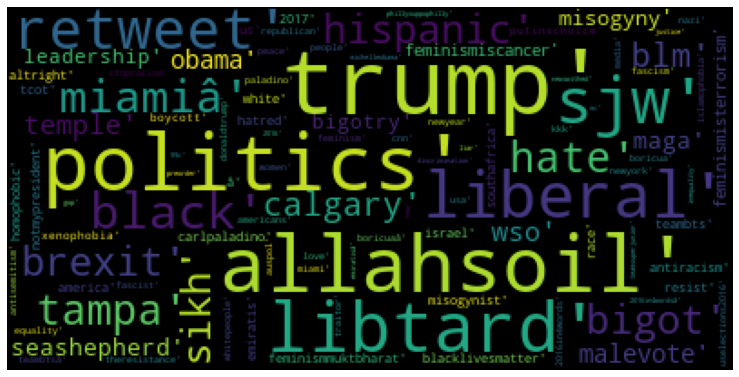

In [83]:
# Word cloud of top mentioned hashtags in Offensive tweets
plot_word_cloud(offensive_hashtags)

In [84]:
# Count of each hashtags
non_offensive_hashtag_counts = Counter(non_offensive_hashtags)
offensive_hashtag_counts = Counter(offensive_hashtags)

In [85]:
# Creating hashtag counts DataFrame for easy manipulation and visualization

non_offensive_hashtag_counts_df = pd.DataFrame.from_dict(non_offensive_hashtag_counts, orient="index").reset_index()
non_offensive_hashtag_counts_df.columns = ["hashtag", "count"]
non_offensive_hashtag_counts_df.sort_values("count", ascending=False, inplace=True)
display(non_offensive_hashtag_counts_df.head())

offensive_hashtag_counts_df = pd.DataFrame.from_dict(offensive_hashtag_counts, orient="index").reset_index()
offensive_hashtag_counts_df.columns = ["hashtag", "count"]
offensive_hashtag_counts_df.sort_values("count", ascending=False, inplace=True)
display(offensive_hashtag_counts_df.head())

,hashtag,count
33,love,1362
39,positive,732
143,healthy,564
38,thankful,490
189,smile,476


,hashtag,count
22,trump,129
31,politics,94
67,allahsoil,92
28,libtard,76
30,liberal,75


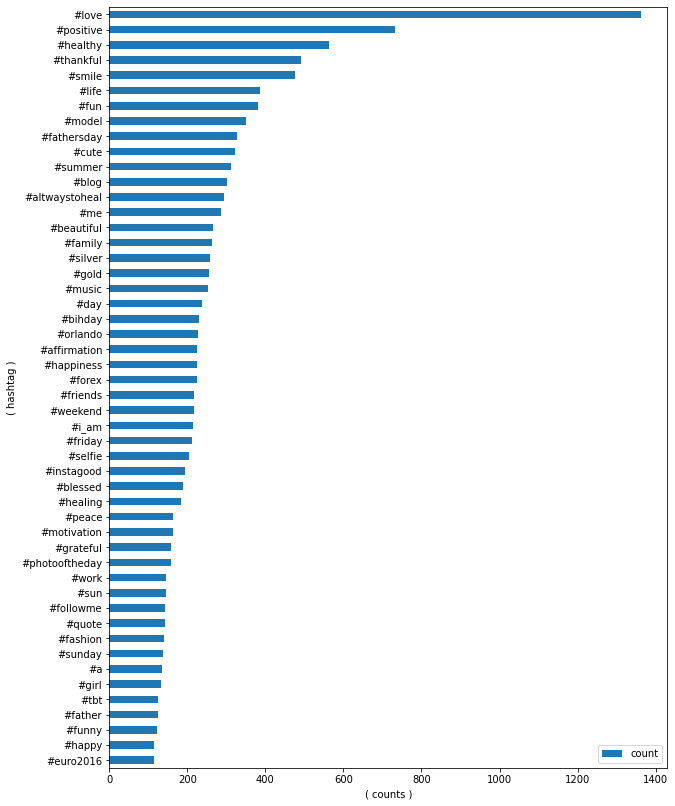

In [86]:
# Bar plot of top hashtag counts in Non-offensive tweets 
ax5 = non_offensive_hashtag_counts_df.head(50).plot.barh(y="count", figsize=(10, 14))
ax5.set(xlabel="( counts )", ylabel="( hashtag )")
ax5.set_yticklabels(non_offensive_hashtag_counts_df.head(50).agg({"hashtag": lambda x: '#'+x}).values.flatten())
ax5.invert_yaxis()
plt.show()

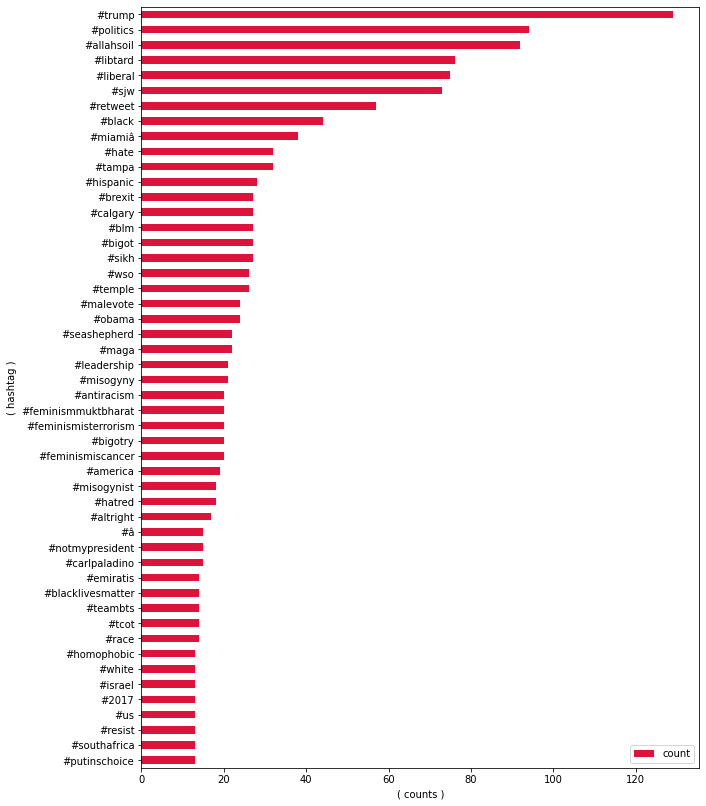

In [87]:
# Bar plot of top hashtag counts in Offensive tweets 
ax6 = offensive_hashtag_counts_df.head(50).plot.barh(y="count", figsize=(10, 14), color="crimson")
ax6.set(xlabel="( counts )", ylabel="( hashtag )")
ax6.set_yticklabels(offensive_hashtag_counts_df.head(50).agg({"hashtag": lambda x: '#'+x}).values.flatten())
ax6.invert_yaxis()
plt.show()

In [88]:
def count_rows_with_hashtag(df_series):
    """ Counts the number of rows containing at least one hashtag (#example).
    
    Args:
        df_series (pd.Series): Pandas series containing text data.
        
    Returns:
        count (int): Count of number of rows containing at least one hashtag.
    """
    
    count = 0
    for tweet in df_series:
        if re.search(r'#(\w+)', tweet):
            count+=1
    
    return count

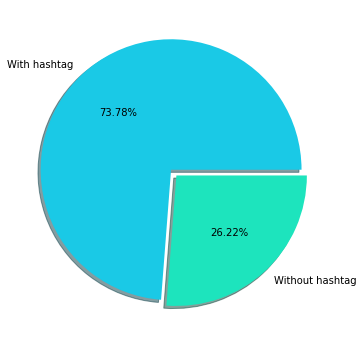

In [89]:
# Counts number of rows containing a hashtag
hashtag_tweet_count = count_rows_with_hashtag(train["tweet"])

train_rows, train_cols = train.shape

plt.figure(figsize=(6, 6))

# Creates pie chart
plt.pie(
    [hashtag_tweet_count, train_rows-hashtag_tweet_count],
    autopct = "%.2f%%",
    labels = ["With hashtag", "Without hashtag"],
    explode = [0, 0.06],
    shadow = True,
    colors = ["#1AC9E6", "#1DE4BD"]
)

plt.show()

In [90]:
train

,label,tweet,length,tweets_word_count,language,clean_tweet,clean_token_tweet,token_word_count
0,0,@user when a father is dysfunctional and is s...,102,18,en,user father dysfunctional selfish drags kids d...,"[user, father, dysfunctional, selfish, drags, ...",8
1,0,@user @user thanks for #lyft credit i can't us...,122,19,en,user user thanks lyft credit cant use cause do...,"[user, user, thanks, lyft, credit, cant, use, ...",15
3,0,#model i love u take with u all the time in ...,86,14,en,model love take time ur,"[model, love, take, time, ur]",5
4,0,factsguide: society now #motivation,39,4,en,factsguide society motivation,"[factsguide, society, motivation]",3
5,0,[2/2] huge fan fare and big talking before the...,116,19,en,huge fan fare big talking leave chaos pay dis...,"[huge, fan, fare, big, talking, leave, chaos, ...",12
...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,5,en,ate user isz youuu,"[ate, user, isz, youuu]",4
31958,0,to see nina turner on the airwaves trying to...,131,23,en,see nina turner airwaves trying wrap mantle ge...,"[see, nina, turner, airwaves, trying, wrap, ma...",14
31959,0,listening to sad songs on a monday morning otw...,63,13,en,listening sad songs monday morning otw work sad,"[listening, sad, songs, monday, morning, otw, ...",8
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,10,en,user sikh temple vandalised calgary wso condem...,"[user, sikh, temple, vandalised, calgary, wso,...",8


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(train["clean_tweet"])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
train["label"].unique()

array([0, 1], dtype=int64)

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,train["label"],test_size = 0.2,random_state = 42)

In [96]:
X

<29511x37740 sparse matrix of type '<class 'numpy.float64'>'
	with 245494 stored elements in Compressed Sparse Row format>

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [113]:
model = DecisionTreeClassifier(random_state = 1, max_depth=2)
model.fit(X_train, y_train)

y_pred_dt = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Validation Accuracy :", model.score(X_test, y_test))
print(classification_report(y_test, y_pred_dt))
confusion_matrix(y_test, y_pred_dt, labels=[1,0])

Training Accuracy : 0.9290918332768553
Validation Accuracy : 0.9305437912925631
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5470
           1       0.64      0.12      0.21       433

    accuracy                           0.93      5903
   macro avg       0.79      0.56      0.58      5903
weighted avg       0.91      0.93      0.91      5903



array([[  53,  380],
       [  30, 5440]], dtype=int64)

In [99]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_dt = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Validation Accuracy :", model.score(X_test, y_test))
print(classification_report(y_test, y_pred_dt))
confusion_matrix(y_test, y_pred_dt, labels=[1,0])

Training Accuracy : 0.9998729244323958
Validation Accuracy : 0.9576486532271726
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5470
           1       0.95      0.45      0.61       433

    accuracy                           0.96      5903
   macro avg       0.95      0.72      0.79      5903
weighted avg       0.96      0.96      0.95      5903



array([[ 194,  239],
       [  11, 5459]], dtype=int64)

In [110]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_dt = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Validation Accuracy :", model.score(X_test, y_test))
print(classification_report(y_test, y_pred_dt))
confusion_matrix(y_test, y_pred_dt, labels=[1,0])

Training Accuracy : 0.9498898678414097
Validation Accuracy : 0.9420633576147721
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5470
           1       0.93      0.23      0.36       433

    accuracy                           0.94      5903
   macro avg       0.94      0.61      0.67      5903
weighted avg       0.94      0.94      0.93      5903



array([[  98,  335],
       [   7, 5463]], dtype=int64)

In [101]:
models=[]
models.append(('LR', LogisticRegression(max_iter=1000))) 
models.append(('RFC', RandomForestClassifier())) 
models.append(('DSC', DecisionTreeClassifier(random_state = 1, max_depth=2)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
 cv_results = cross_val_score(model, X,train["label"] , cv=kfold, scoring='accuracy') 
 results.append(cv_results)
 names.append(name)
 msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.95 (0.002)
RFC: 0.96 (0.002)
DSC: 0.93 (0.002)


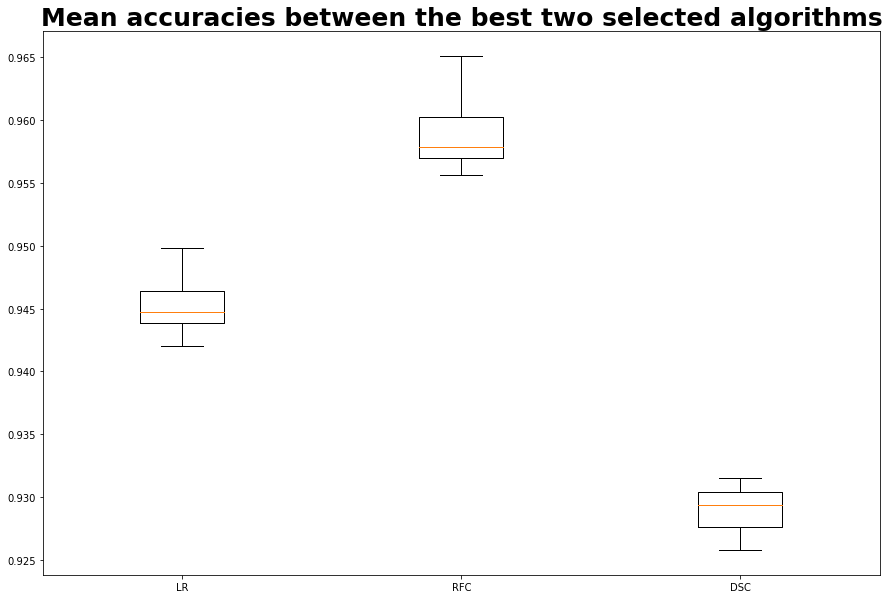

In [109]:
plt.figure(figsize = (15, 10))
plt.grid(False)
plt.title("Mean accuracies between the best two selected algorithms", fontsize = 25, fontweight = 'bold')
plt.boxplot(results,labels=['LR', 'RFC','DSC'])
plt.show()

In [121]:
from statistics import mean
import numpy as np

RFC Mean Accuracy: 95.9% +/-(0.003)
LR Mean Accuracy: 94.5% +/-(0.002)
DCT Mean Accuracy: 92.9% +/-(0.002)


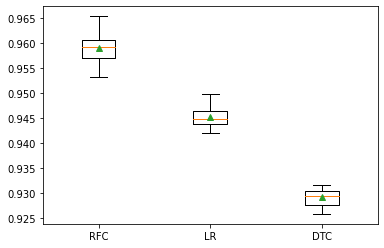

In [123]:
# evaluate model 1
model1 = RandomForestClassifier()
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(model1, X,train["label"], scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('RFC Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores1*100), np.std(scores1)))

# evaluate model 2
model2 = LogisticRegression(max_iter=1000)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores2 = cross_val_score(model2, X,train["label"], scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('LR Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores2*100), np.std(scores2)))

# evaluate model 3
model3 = DecisionTreeClassifier(random_state = 1, max_depth=2)
cv3 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores3 = cross_val_score(model3, X,train["label"], scoring = 'accuracy', cv = cv3, n_jobs = -1)
print('DCT Mean Accuracy: %.1f%% +/-(%.3f)' % (mean(scores3*100), np.std(scores3)))

# plot the results
plt.boxplot([scores1, scores2,scores3], labels=['RFC','LR', 'DTC'], showmeans=True)
plt.show()

In [127]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [129]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, 
                          estimator2=model2, 
                          X=X, 
                          y=train["label"], 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.000
The t-statistics is = 10.164
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.
